# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # Color map

from sympy import symbols, diff

%matplotlib inline

# Example 1 - A simple Cost Function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

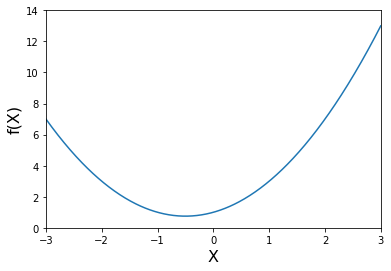

In [4]:
# Plot
plt.plot(x_1, f(x_1))
plt.xlim(-3, 3)
plt.ylim(0, 14)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

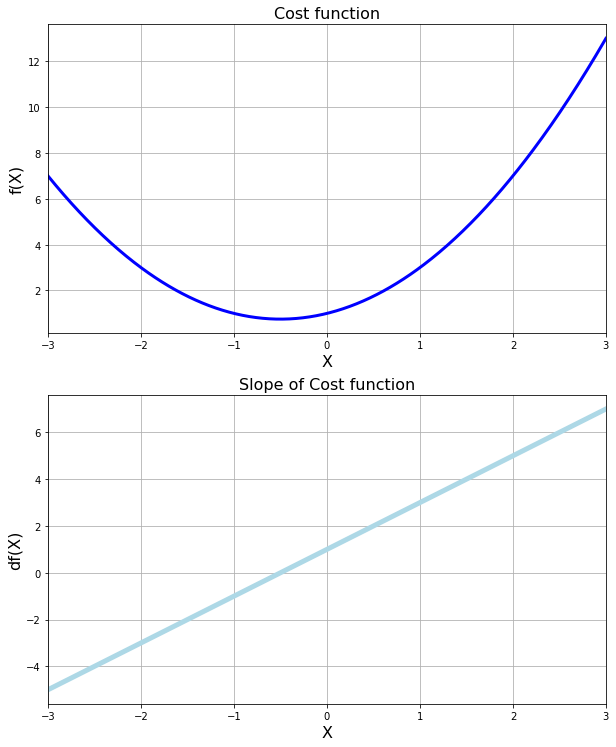

In [6]:
# Plot function and derivative

plt.figure(figsize=[10, 12.5])

# Chart 1: Cost function
plt.subplot(2, 1, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlim(-3, 3)
# plt.ylim(0, 14)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(2, 1, 2)
plt.plot(x_1, df(x_1), color='lightblue', linewidth=5)
plt.xlim(-3, 3)
# plt.ylim(-3, 5)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)
plt.grid()

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Gradient descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Precision reached at step', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slop of df(x) at this pint is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Precision reached at step 61
Local minimum occurs at: -0.4999965672099885
Slop of df(x) at this pint is: 6.8655800230521535e-06
f(x) value or cost at this point is: 0.750000000011784


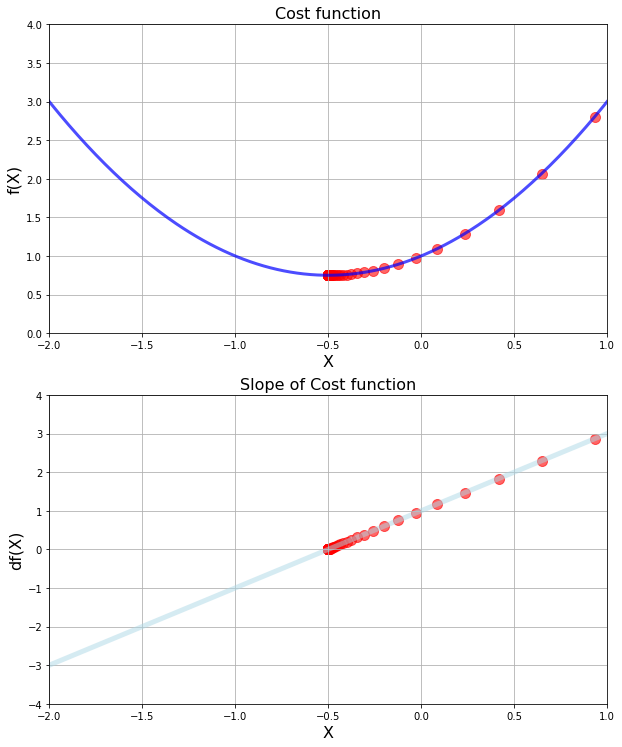

In [8]:
# Superimpose gradient descent with plots

plt.figure(figsize=[10, 12.5])

# Chart 1: Cost function and gradient descent
plt.subplot(2, 1, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(values, f(values), color='red', s=100, alpha=0.6)

plt.xlim(-2, 1)
plt.ylim(0, 4)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(2, 1, 2)
plt.plot(x_1, df(x_1), color='lightblue', linewidth=5, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)
plt.xlim(-2, 1)
plt.ylim(-4, 4)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)
plt.grid()

plt.show()

# Example 2: Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

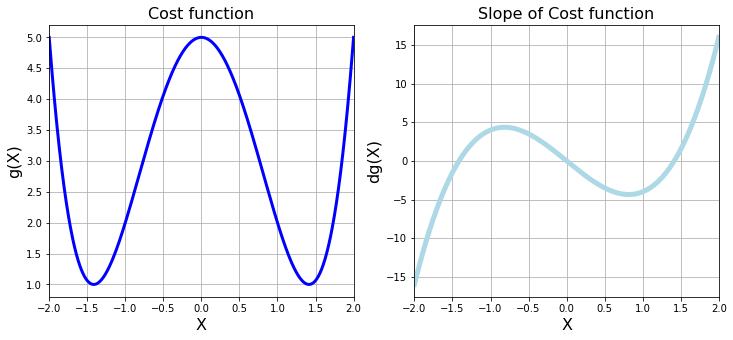

In [10]:
# Plot function and derivative side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.xlim(-2, 2)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='lightblue', linewidth=5)
plt.xlim(-2, 2)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)
plt.grid()

plt.show()

## Gradient Descent as a Pyhton Function

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.000001, max_iter=300):
    '''Gradient descent method for finding local minima.'''
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
        
    return new_x, x_list, slope_list # Values are packed in a tuple

In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.000001, 300) # Values are unpacked into 3 variables
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4142116468057846
Number of steps: 41


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=-0.5,
                                                 multiplier=0.02,
                                                 precision=0.000001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4142116468057846
Number of steps: 41


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.414211502121664
Number of steps: 52


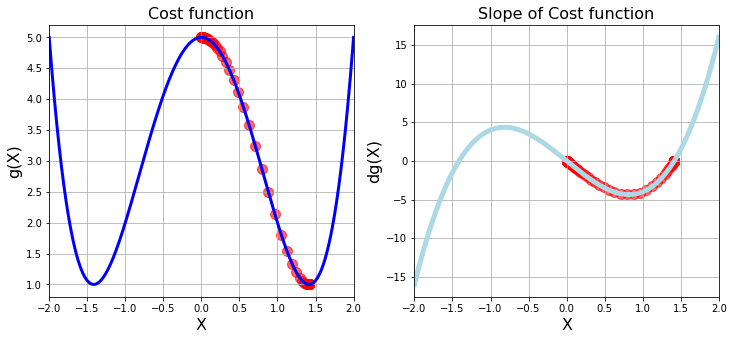

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.001)
# Try diffrent initial guess, namely: -2, -0.1, 0.1, 2
# Try with zero!

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='lightblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)
plt.grid()

plt.show()

# Example 3 - Divergence, Overflow & Python tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [16]:
# Make some data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

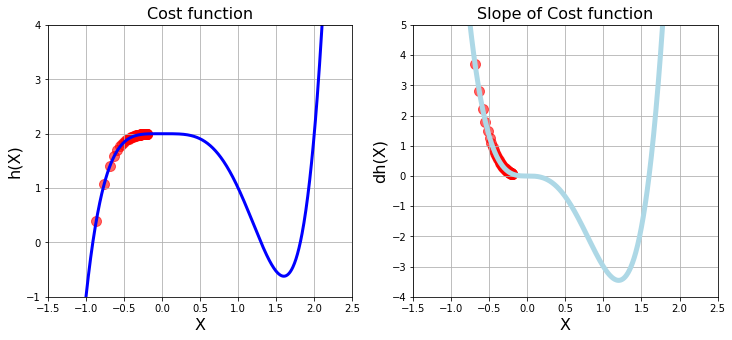

Local min occurs at: -2071072.4470816324
Cost at this minimum is: -3.810455326061589e+31
Number of steps: 71


In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Plot function and derivative side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_3, h(x_3), color='blue', linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
plt.xlim(-1.5, 2.5)
plt.ylim(-1,4)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color='lightblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.xlim(-1.5, 2.5)
plt.ylim(-4,5)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(X)', fontsize=16)
plt.grid()

plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [18]:
import sys
# help(sys)
# sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [19]:
# Create a tuple - tuple packing
breakfast = 'coffee', 'eggs', 'bacon', 'orange juice' # No es obligatorio el paréntesis
prime_numbers = (1, 2, 3, 5, 7)

# Tuple with single value
tuple_with_single_value = 42,
other_tuple_with_single_value = 'Hello world!',
print(type(breakfast))
print(type(prime_numbers))
print(type(tuple_with_single_value))
print(type(other_tuple_with_single_value))

# How to sccess a value of a tuple 
print(breakfast[0])

# Sequence Unpacking - Unpacking the values of a tuple
c1, c2, c3, c4 = breakfast
print(type(c1))

# Tuples can't change
# prime_numbers[1] = 11 # TypeError

data_tuple = gradient_descent(dh, 0.2)
print('Local min occurs at:', data_tuple[0])
print('Cost at this minimum is:', h(data_tuple[0]))
print('Number of steps:', len(data_tuple[1]))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
coffee
<class 'str'>
Local min occurs at: 1.5999988880045206
Cost at this minimum is: -0.6214399999873379
Number of steps: 130


# The Learning Rate

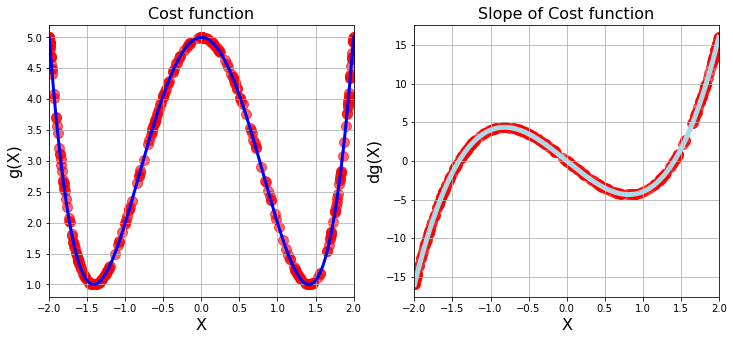

In [20]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.001, multiplier=0.25)
# No hay convergencia con multiplier = 0.25
# Hay desborde con multiplier = 0.3

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='lightblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)
plt.grid()

plt.show()

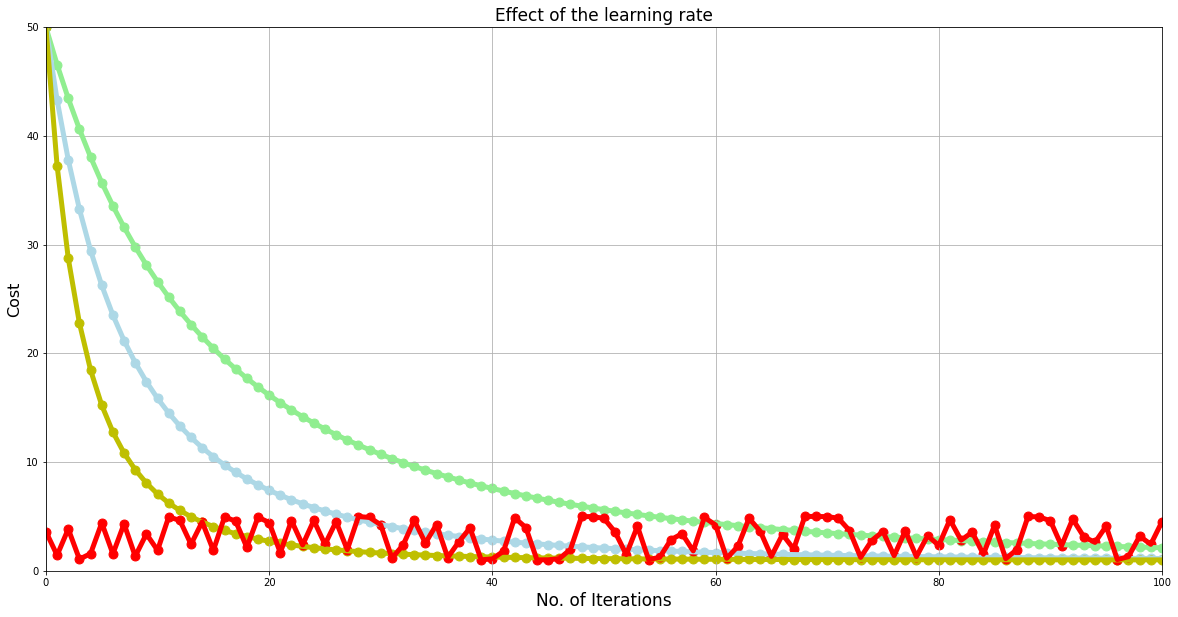

In [21]:
# Run gradient descent 3 times

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No. of Iterations', fontsize=17)
plt.ylabel('Cost', fontsize=16)
plt.grid()

# X values
iteration_list = list(range(0, n+1))

# Y Values for our chart - Low values
low_values = np.array(low_gamma[1])

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Y Values for our chart - Mid values
mid_values = np.array(mid_gamma[1])

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='lightblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='lightblue', s=80)

# Y Values for our chart - High values
high_values = np.array(high_gamma[1])

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='y', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='y', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [22]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [23]:
# Make our x and y data
x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)

print('Shape of X array:', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape of X after meshgrid:', x_4.shape)

Shape of X array: (200,)
Shape of X after meshgrid: (200, 200)


/tmp/ipykernel_4475/501723755.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


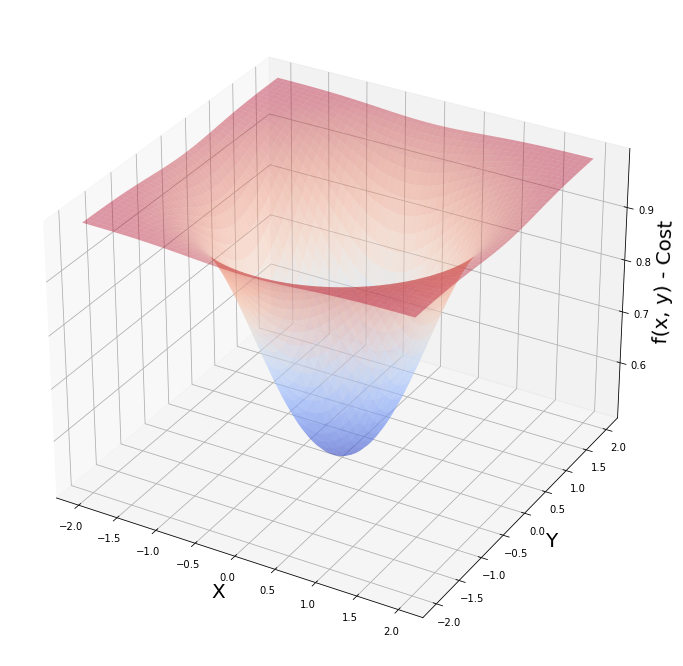

In [24]:
# Generate 3D figure
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

## Partial Derivatives & Simbolic Computation

## $$\frac {\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{(-x^2-y^2)}}{ \left( 3^{-x^2-y^2}+1 \right) ^2}$$

## $$\frac {\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{(-x^2-y^2)}}{ \left( 3^{-x^2-y^2}+1 \right) ^2}$$

In [25]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivative wrt x is:', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 y=1.0:',
      f(a, b).evalf(subs={a: 1.8, b:1.0}))
print('Value of the partial derivative wrt x at x=1.8 y=1.0:',
     diff(f(a, b), a).evalf(subs={a: 1.8, b:1.0}))

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0: 0.990604794032582
Value of the partial derivative wrt x at x=1.8 y=1.0: 0.0368089716197505


# Batch Gradeint Descent with SymPy

In [26]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Valuse in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Valuse in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [29]:
# Partial derivative function example 4
def fpx(x, y):
    r = 3**(-x**2-y**2)
    return 2*x*np.log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2-y**2)
    return 2*y*np.log(3)*r / (r + 1)**2

In [30]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Valuse in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Valuse in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [31]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Valuse in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

(1, 2)
Valuse in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


In [43]:
# Advanced Numpy Array Practice
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]:', hs_band[0])
print('hs_band[1][0]:', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) # axis=0 -> Values added as a row
                                                        # axis=1 -> Values added as a column
print(the_roots)
print('Printing nicknames...', the_roots[:,0])

the_roots = np.append(the_roots, [['Malick B', 'MC']], 0)
print('Printing the roles...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0]: ['Black Thought' 'MC']
hs_band[1][0]: Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing the roles... ['MC' 'Drums' 'Guitar' 'MC']
